## Function Pipeline

In [1]:
import torch

print(torch.version.cuda)  # type: ignore
print(torch.cuda.is_available())
print(torch.cuda.device_count())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA not available")

12.6
True
1
NVIDIA GeForce RTX 4060 Laptop GPU


### Sentiment-Analysis

In [2]:
from transformers.pipelines import pipeline

classifier = pipeline("sentiment-analysis")  # type: ignore
result = classifier("I've been waiting for a HuggingFace course of my whole life")
print(result)

/home/developer/Dev/Hands-on-Machine-Learning-Projects/Multi-Domain Sentiment Analyzer (MDSA)/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.8563370108604431}]


In [3]:
from transformers.pipelines import pipeline

classifier = pipeline(
    "sentiment-analysis", # type: ignore
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=-1,  # Use GPU 0
)
result = classifier(["I've been waiting for a HuggingFace course of my whole life", "I hate this so much!"])
print(result)

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.8563390374183655}, {'label': 'NEGATIVE', 'score': 0.9994558691978455}]


### Zero Shot Classification

In [4]:
from transformers.pipelines import pipeline

classifier = pipeline("zero-shot-classification")
classifier(sequences = "This is a course about the Transformers library",
           candidate_labels = ["education", "politics", "business"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445954322814941, 0.11197687685489655, 0.04342767968773842]}

### Text Generator

In [5]:
from transformers.pipelines import pipeline
generator = pipeline("text-generation")
Generated_text  = generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [71]:
print(Generated_text[0]['generated_text'])

Yesterday I saw a bunch of people get on the web yesterday, but it was not one of them. There was another, and a big one, but I think the reason I saw this is because the website was built on the belief in God that people who have been lied to by the public will take a back seat to the status quo and start believing in God. The internet is a place where people are not allowed to be deceived, they are allowed to be deceived, and they may be allowed to do whatever they want.

For me, it was an interesting time for me to see a lot of people get on the web. It took me about 25 years to get started. My first job was when I first started my career in marketing and marketing. I started selling products all over the world to people by email and then they started seeing my products and products.
It was really exciting for me to see my products being sold on the web for the first time and then they started seeing my products and products. I used to just keep telling people about my products, eve

In [56]:
from transformers.pipelines import pipeline

generator = pipeline(task="text-generation", model = "distilgpt2")
Generated_text = generator(
    text_inputs="Yesterday I saw",
    max_length=30,
    num_return_sequences=2)
print(Generated_text[0]["generated_text"])

loading configuration file config.json from cache at /home/developer/.cache/huggingface/hub/models--distilgpt2/snapshots/2290a62682d06624634c1f46a6ad5be0f47f38aa/config.json
Model config GPT2Config {
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 6,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generati

Yesterday I saw a bunch of people get on the web yesterday, but it was not one of them. There was another, and a big one, but I think the reason I saw this is because the website was built on the belief in God that people who have been lied to by the public will take a back seat to the status quo and start believing in God. The internet is a place where people are not allowed to be deceived, they are allowed to be deceived, and they may be allowed to do whatever they want.

For me, it was an interesting time for me to see a lot of people get on the web. It took me about 25 years to get started. My first job was when I first started my career in marketing and marketing. I started selling products all over the world to people by email and then they started seeing my products and products.
It was really exciting for me to see my products being sold on the web for the first time and then they started seeing my products and products. I used to just keep telling people about my products, eve

### Fill the mask

In [ ]:
from transformers.pipelines import pipeline
unmasker = pipeline(task="fill-mask", model="distilroberta")
output = unmasker("I was watching a movie for 007 who was called <mask> and it was so amazing",top_k=14)
# top_k is an argument for the top accuracy of the outputs
print(output)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at /home/developer/.cache/huggingface/hub/models--distilbert--distilroberta-base/snapshots/fb53ab8802853c8e4fbdbcd0529f21fc6f459b2b/config.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.53.0",
 

[{'score': 0.02006089873611927, 'token': 37523, 'token_str': ' Spectre', 'sequence': 'I was watching a movie for 007 who was called Spectre and it was so amazing'}, {'score': 0.018979698419570923, 'token': 30258, 'token_str': ' Dexter', 'sequence': 'I was watching a movie for 007 who was called Dexter and it was so amazing'}, {'score': 0.018288856372237206, 'token': 17923, 'token_str': ' Batman', 'sequence': 'I was watching a movie for 007 who was called Batman and it was so amazing'}, {'score': 0.013888650573790073, 'token': 25143, 'token_str': ' Superman', 'sequence': 'I was watching a movie for 007 who was called Superman and it was so amazing'}, {'score': 0.012317177839577198, 'token': 43433, 'token_str': ' Dracula', 'sequence': 'I was watching a movie for 007 who was called Dracula and it was so amazing'}, {'score': 0.011216351762413979, 'token': 20088, 'token_str': ' Lucky', 'sequence': 'I was watching a movie for 007 who was called Lucky and it was so amazing'}, {'score': 0.0109

### NER

In [70]:
ner = pipeline("ner", grouped_entities=True)  # type: ignore
text = ner(
    "My name is Mohammed Khalaf and I'm working at Noor Al-Mamzer Group in Dubai as an AI Developer"
)
for entity in text:
    print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at /home/developer/.cache/huggingface/hub/models--dbmdz--bert-large-cased-finetuned-conll03-english/snapshots/4c534963167c08d4b8ff1f88733cf2930f86add0/config.json
Model config BertConfig {
  "_num_labels": 9,
  "architectures": [
    "BertForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "O",
    "1": "B-MISC",
    "2": "I-MISC",
    "3": "B-PER",
    "4": "I-PER",
    "5": "B-ORG",
    "6": "I-ORG",
    "7": "B-LOC",
    "8": "I-LOC"
  },
  "initializer_range": 0.02,
  "intermediate_size":

{'entity_group': 'PER', 'score': np.float32(0.9964017), 'word': 'Mohammed Khalaf', 'start': 11, 'end': 26}
{'entity_group': 'ORG', 'score': np.float32(0.9506372), 'word': 'Noor Al - Mamzer Group', 'start': 46, 'end': 66}
{'entity_group': 'LOC', 'score': np.float32(0.99957806), 'word': 'Dubai', 'start': 70, 'end': 75}


In [ ]:
ner = pipeline("ner", grouped_entities=True)  # type: ignore

In [81]:
# Example: Using HuggingFace Transformers Pipelines

# 1. Sentiment Analysis
sentiment = classifier("Transformers are amazing!")
print("Sentiment Analysis:", sentiment)

Sentiment Analysis: [{'label': 'POSITIVE', 'score': 0.9998725652694702}]


In [80]:
# 2. Zero-Shot Classification
zero_shot = pipeline("zero-shot-classification")
zero_shot_result = zero_shot(
    sequences="Transformers can do many NLP tasks.",
    candidate_labels=["text classification", "image recognition", "speech synthesis"],
)
print("Zero-Shot Classification:", zero_shot_result)

# 3. Text Generation
generated = generator("Once upon a time,", max_length=30)
print("Text Generation:", generated[0]["generated_text"])

# 4. Fill-Mask
masked_sentence = "The capital of France is <mask>."
mask_result = unmasker(masked_sentence, top_k=1)
print("Fill-Mask:", mask_result)

# 5. Named Entity Recognition (NER)
ner_result = ner("Barack Obama was born in Hawaii.")
print("NER:", ner_result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at /home/developer/.cache/huggingface/hub/models--facebook--bart-large-mnli/snapshots/d7645e127eaf1aefc7862fd59a17a5aa8558b8ce/config.json
Model config BartConfig {
  "_num_labels": 3,
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_final_layer_norm": false,
  "architectures": [
    "BartForSequenceClassification"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 12,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "enco

Zero-Shot Classification: {'sequence': 'Transformers can do many NLP tasks.', 'labels': ['speech synthesis', 'text classification', 'image recognition'], 'scores': [0.37233418226242065, 0.31807729601860046, 0.3095884621143341]}
Text Generation: Once upon a time, there was only one thing I could remember: the fact that I had never heard of the first day's story.


I remember the first day when I was at the top of my lungs, and I had never seen a man in a lifetime.
In the beginning, I was afraid I was going to die.
Then I came up with a plan that made my life more difficult.
Before I could sleep, I made sure I did not put a hand on my back, so that I would not have to have to run off.
The next morning, I woke up to the realization that I had become an impotent, miserable man.
The next day of my life, I woke up to the realization that I had become an impotent, miserable man.
This morning, I woke up to the realization that I had become an impotent, miserable man.
I woke up to the realizati

In [82]:
qa_pipeline = pipeline("question-answering")
context = "HuggingFace Transformers is a popular library for natural language processing tasks."
question = "What is HuggingFace Transformers?"
answer = qa_pipeline(question=question, context=context)
print(answer)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at /home/developer/.cache/huggingface/hub/models--distilbert--distilbert-base-cased-distilled-squad/snapshots/564e9b582944a57a3e586bbb98fd6f0a4118db7f/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForQuestionAnswering"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": true,
  "tie_weights_": true,
  "transformers_version": "4.53

{'score': 0.47380131483078003, 'start': 28, 'end': 83, 'answer': 'a popular library for natural language processing tasks'}



# What happens inside the pipeline function? (PyTorch)

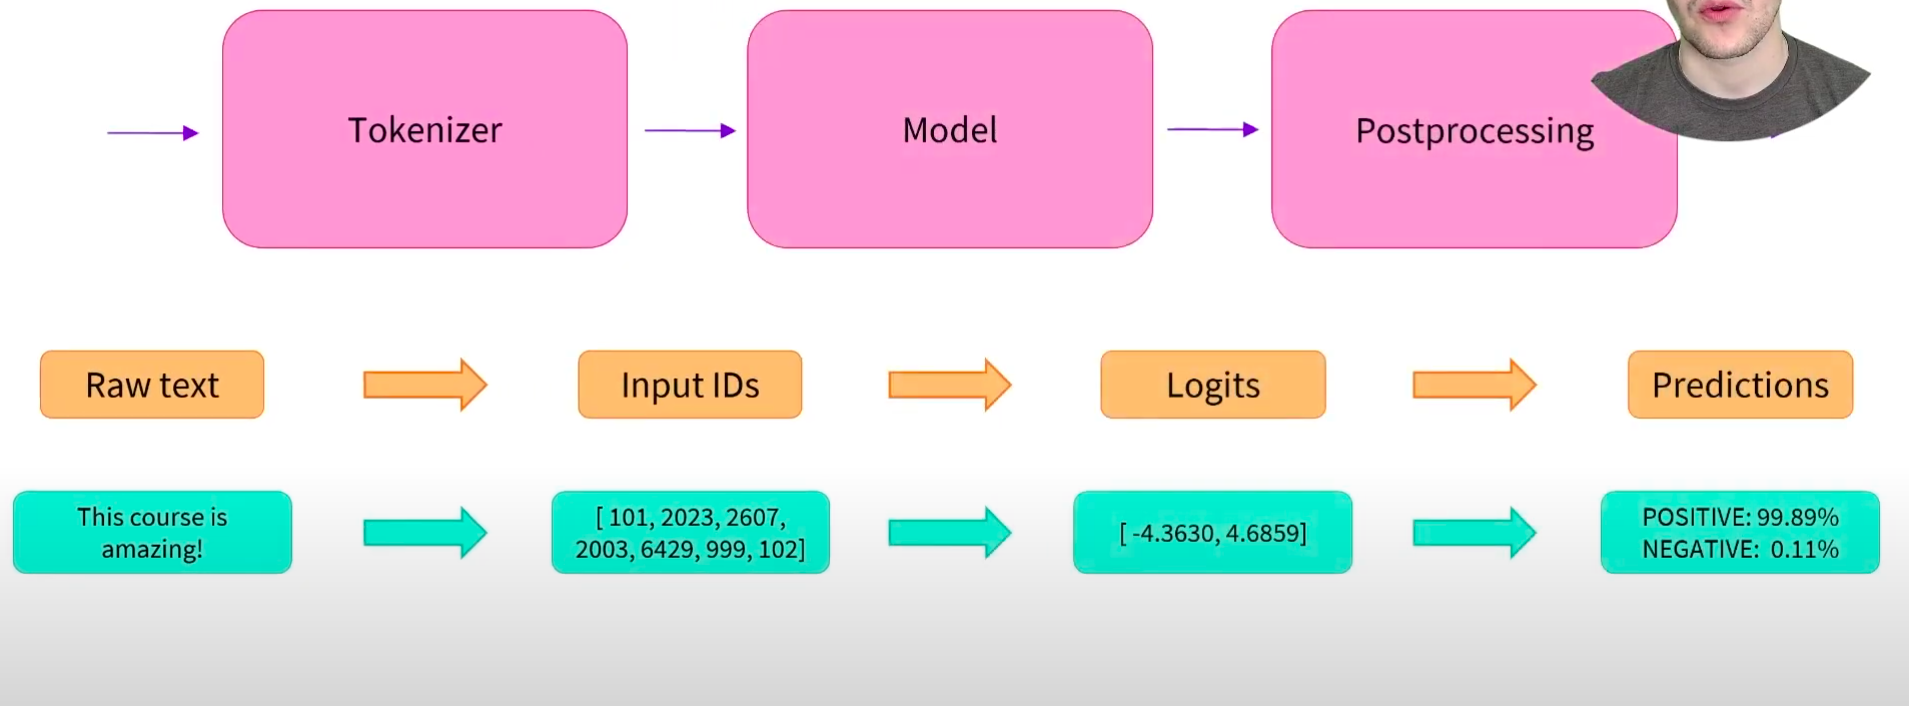

In [ ]:
from transformers.pipelines import pipeline

# classifier = pipeline("sentiment-analysis")

classifier = pipeline(
    "sentiment-analysis",  # type: ignore
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=-1,  # Use GPU 0
)

classifier([
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!"
])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [5]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


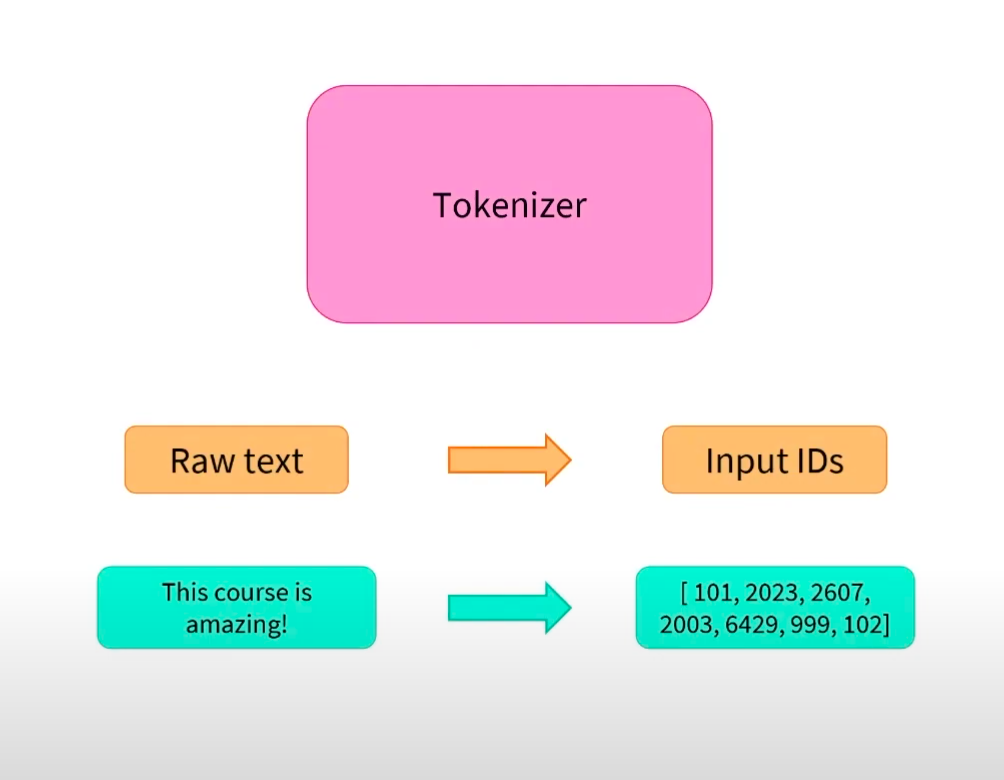

In [6]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


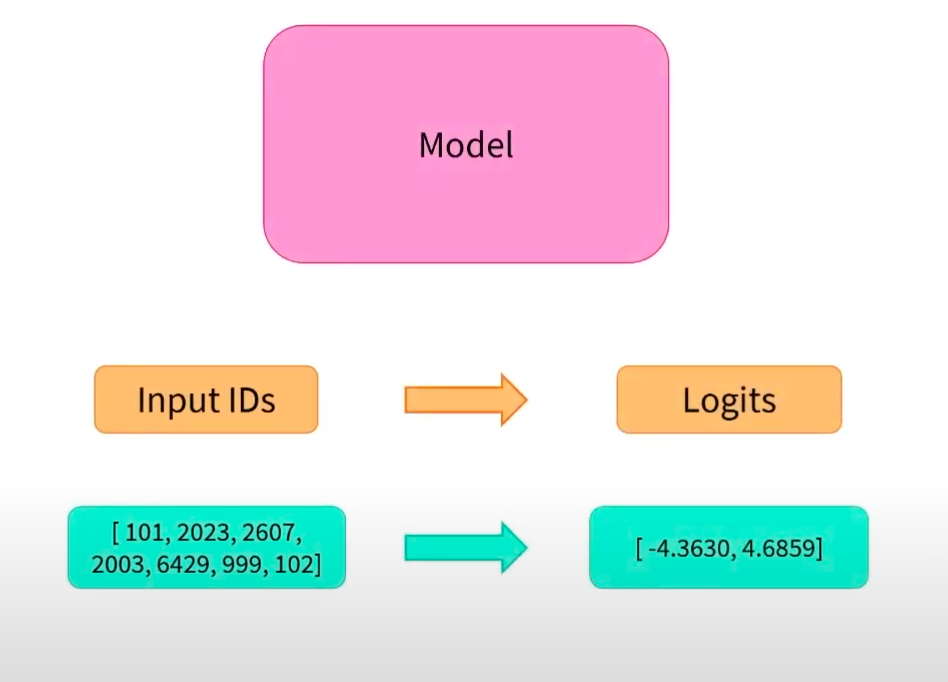

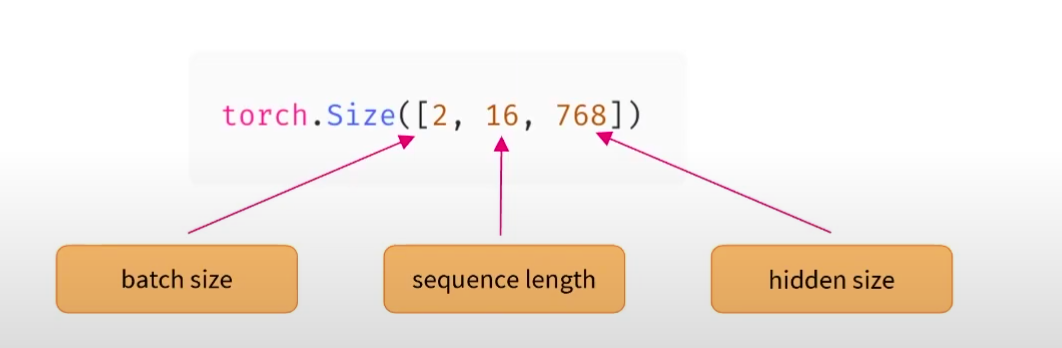

In [7]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


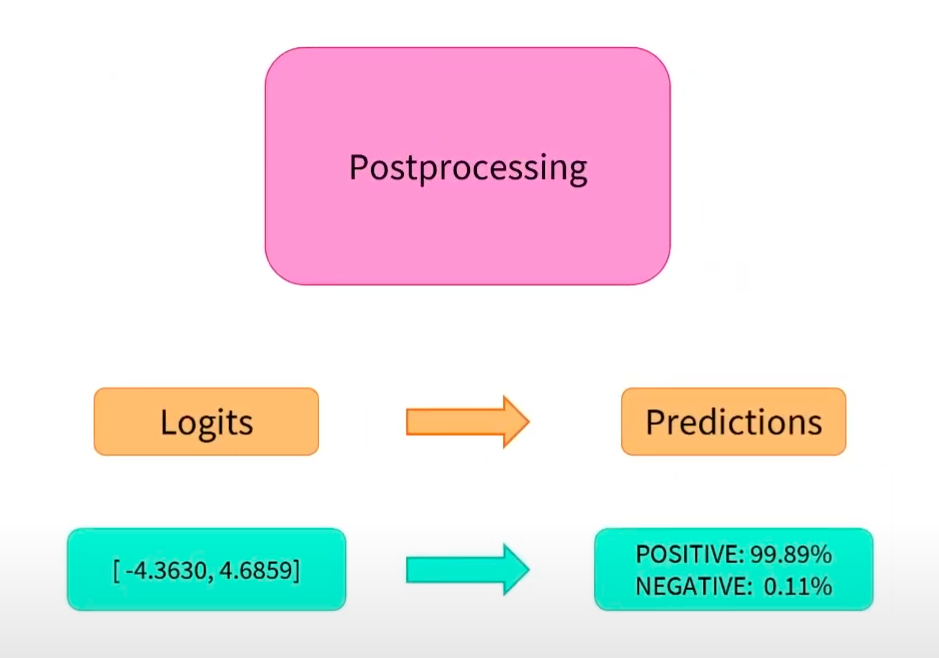

In [8]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [9]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}